# Machine Learning - Andrew Ng ( Python Implementation)

##  Logistic Regression

### Loading of Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df=pd.read_csv('/Users/elahehbeheshti/desktop/Fall2024/Machine Learning/Algorithm/pima-indians-diabetes.csv')

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [7]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [8]:
df.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Plotting of Data

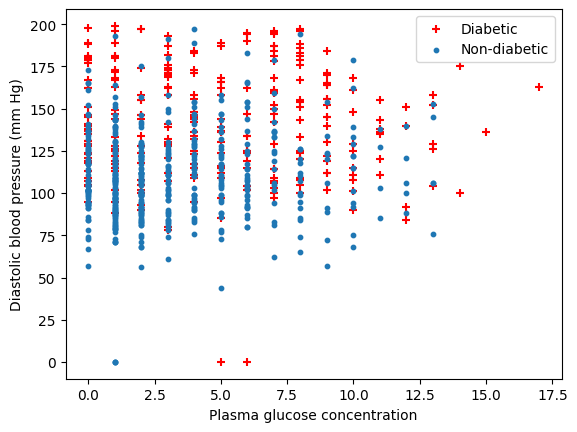

In [15]:
pos, neg = (y == 1).reshape(767, 1), (y == 0).reshape(767, 1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Plasma glucose concentration")
plt.ylabel("Diastolic blood pressure (mm Hg)")
plt.legend(["Diabetic","Non-diabetic"],loc=0)

### implementation using sklearn

In [19]:
from sklearn.model_selection import train_test_split

X_sk_train, X_sk_test, y_sk_train, y_sk_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
# Print sizes of the training and testing sets

print('X-sk-train size', X_sk_train.size)
print('X-sk-test size', X_sk_test.size)
print('y-sk-train size', y_sk_train.size)
print('y-sk-test size', y_sk_test.size)


X-sk-train size 4288
X-sk-test size 1848
y-sk-train size 536
y-sk-test size 231


In [20]:
# Count the occurrences of each label in the original, train, and test sets
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_sk_train))
print('Labels counts in y_test:', np.bincount(y_sk_test))

Labels counts in y: [500 267]
Labels counts in y_train: [349 187]
Labels counts in y_test: [151  80]


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_sk_train)
X_sk_train_std = sc.transform(X_sk_train)
X_sk_test_std = sc.transform(X_sk_test)

In [23]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
Pima = LogisticRegression()
model = Pima.fit(X_sk_train_std, y_sk_train)
alpha = model.intercept_
betas = model.coef_
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [-0.87313668]
betas = [[ 4.25020999e-01  1.04280115e+00 -3.38304198e-01 -7.64504856e-02
  -2.62552360e-04  7.94966161e-01  3.17693033e-01  1.70230545e-01]]


In [25]:
y_sk_pred = Pima.predict(X_sk_test_std)
print('Misclassified samples: %d' % (y_sk_test != y_sk_pred).sum())

Misclassified samples: 51


In [26]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_sk_test, y_sk_pred)
print(cm)

[[136  15]
 [ 36  44]]


In [27]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_sk_test, y_sk_pred))

Accuracy: 0.78


In [28]:
from sklearn.metrics import classification_report 
print(classification_report(y_sk_test, y_sk_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       151
           1       0.75      0.55      0.63        80

    accuracy                           0.78       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



In [30]:
print('Accuracy: %.2f' % Pima.score(X_sk_test_std, y_sk_test))

Accuracy: 0.78


In [31]:
#For prediction, use a single sample after the model is trained:
x_sk_test = np.array([6, 148, 72, 35, 0, 33.6, 0.627, 50]).reshape(1, -1)

prob_sk = Pima.predict(x_sk_test)
print(f"For a patient with features {x_sk_test.flatten()}, we predict a {'Diabetic' if prob_sk[0] else 'Non-diabetic'} outcome.")

For a patient with features [  6.    148.     72.     35.      0.     33.6     0.627  50.   ], we predict a Diabetic outcome.


### implementation using raw methods

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [32]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [33]:
# testing the sigmoid function
sigmoid(0)

0.5

### Compute the Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

In [34]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

### Feature scaling

In [35]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [36]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.6931471805599448
Gradient at initial theta (zeros): [[ 0.15189048]
 [-0.1053192 ]
 [-0.22192024]
 [-0.03090779]
 [-0.03490131]
 [-0.06287323]
 [-0.13943162]
 [-0.08252905]
 [-0.11262241]]


### Gradient Descent

In [37]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [38]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

In [39]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[-0.87504926]
 [ 0.41503563]
 [ 1.12022112]
 [-0.2559096 ]
 [ 0.00526233]
 [-0.13310607]
 [ 0.70758846]
 [ 0.3118769 ]
 [ 0.17156551]]
The cost of the optimized theta: 0.4711790278246272


### Plotting of Cost Function

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
/var/folders/y1/xyrxnh312j387t4r0dqc9v6c0000gn/T/ipykernel_95069/992478879.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


Text(0.5, 1.0, 'Cost function using Gradient Descent')

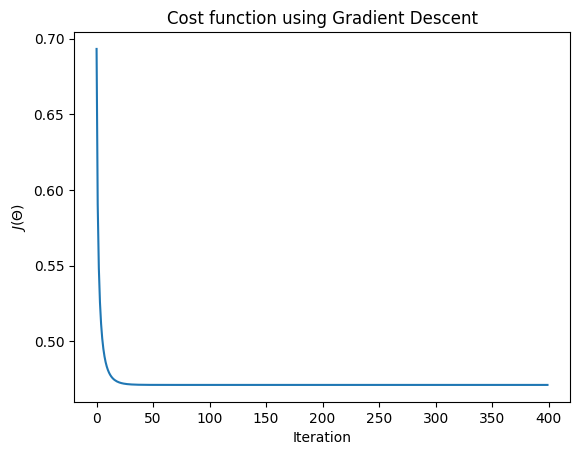

In [40]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Plotting the decision boundary

From Machine Learning Resources:
    
$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$

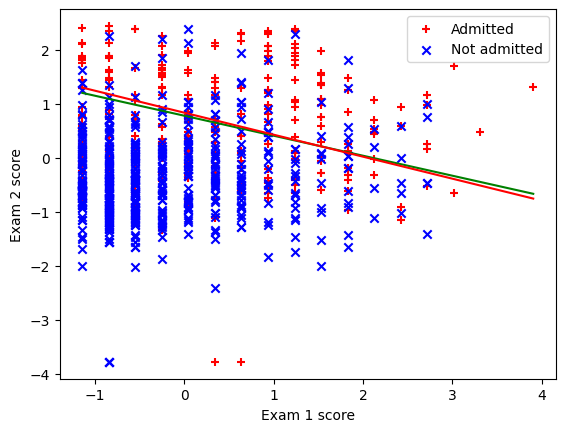

In [41]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
y_sk_value = -(model.intercept_+model.coef_[0,0]*x_value)/model.coef_[0,1]
plt.plot(x_value,y_value, "g")
plt.plot(x_value,y_sk_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Prediction

In [42]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [45]:
# Corrected sample input for the Pima dataset (8 features instead of 2)
# Format: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
x_test = np.array([6, 148, 72, 35, 0, 33.6, 0.627, 50])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a patient with the given features, we predict a probability of having diabetes as:",prob[0])

For a patient with the given features, we predict a probability of having diabetes as: 0.7184463263265266


### Accuracy on training set 

In [49]:
# If p and y are arrays, make sure they are 1D for correct element-wise comparison
p = p.flatten()
y = y.flatten()

# Calculate the number of correct predictions
correct_predictions = sum(p == y)

# Calculate train accuracy as a percentage
train_accuracy = (correct_predictions / len(y)) * 100

# Convert to scalar if it’s still an array
if isinstance(train_accuracy, np.ndarray):
    train_accuracy = train_accuracy.item()

# Print the accuracy as a formatted string
print(f"Train Accuracy: {train_accuracy:.2f}%")


Train Accuracy: 78.23%
